In [1]:
import os
import numpy as np
import pandas as pd

from network import *
from datagen import *
from benchmarks import *

from sklearn.preprocessing import StandardScaler

# IHDP Data Preprocessing

In [2]:
ihdp_train = np.load('./realdata/ihdp_npci_1-100.train.npz')
ihdp_test = np.load('./realdata/ihdp_npci_1-100.test.npz')

In [3]:
t_all = np.concatenate([ihdp_train['t'],ihdp_test['t']])
x_all = np.concatenate([ihdp_train['x'],ihdp_test['x']])
yf_all = np.concatenate([ihdp_train['yf'],ihdp_test['yf']])
ycf_all = np.concatenate([ihdp_train['ycf'],ihdp_test['ycf']])
mu1_all = np.concatenate([ihdp_train['mu1'],ihdp_test['mu1']])
mu0_all = np.concatenate([ihdp_train['mu0'],ihdp_test['mu0']])

In [4]:
df_list = []

for i in range(100):
    t_tmp = t_all[:,i]
    x_tmp = x_all[:,:,i]
    yf_tmp = yf_all[:,i]
    ycf_tmp = ycf_all[:,i]
    mu1_tmp = mu1_all[:,i]
    mu0_tmp = mu0_all[:,i]
    
    df_tmp = pd.DataFrame({'yf':yf_tmp,
              'ycf':ycf_tmp,
               't':t_tmp,
               'mu1':mu1_tmp,
               'mu0':mu0_tmp})
    df_tmp = pd.concat([df_tmp,pd.DataFrame(x_tmp,columns=['x'+str(i+1) for i in range(25)])],axis=1)
    df_tmp = df_tmp.sort_values(by=['t']+['x'+str(i+1) for i in range(25)],ascending=False).reset_index().iloc[:,1:]
    
    df_list.append(df_tmp)

In [5]:
# each data has the same covariate matrix
df_list[0]

,yf,ycf,t,mu1,mu0,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,7.417733,3.308214,1.0,6.424487,2.126094,1.505476,1.396110,-0.360898,0.161703,-0.504155,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.418291,4.082719,1.0,7.051587,3.980419,1.505476,0.596582,-1.105624,-0.879606,-1.566947,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.587765,1.037790,1.0,6.528618,2.359424,1.483860,1.396110,-0.360898,1.203011,-1.066810,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.115796,1.641820,1.0,6.658241,2.685966,1.462243,0.996346,0.011465,0.161703,-0.629189,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.342641,1.713163,1.0,6.523225,2.346736,1.440627,1.180165,-0.733261,0.161703,-0.066534,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2.632686,7.226212,0.0,6.816572,3.146756,-2.298964,-1.402238,1.500917,-0.879606,-2.942326,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
743,-0.331502,6.692783,0.0,5.922879,1.287469,-2.298964,-2.601530,2.618006,-0.879606,-0.191569,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
744,-0.029618,6.949052,0.0,6.021617,1.421080,-2.320581,-3.001294,1.873280,-0.879606,-0.066534,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
745,2.223687,6.592375,0.0,6.916572,3.477703,-2.450277,-2.601530,2.618006,-0.879606,-0.566672,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pate_all = np.array([(df_list[i]['mu1']-df_list[i]['mu0']).mean() for i in range(100)])
pate_all

array([ 4.0160669 ,  4.05083876,  4.09916365,  4.27367846,  4.16243971,
        4.00396759,  3.99054949,  3.85365336, 10.46603732,  4.58600055,
        3.94778503,  4.1613483 , 12.64884216,  3.8613001 ,  3.90758194,
        4.53275184,  3.63698227,  3.76876196,  3.94114814,  4.23595093,
        3.15515811,  4.08726989,  4.31251024,  3.83549159,  4.59564375,
        4.41282505,  3.75550896, 10.46998875,  3.74505892,  4.38459298,
        4.33557326,  4.02288688,  4.15662861,  6.7894158 ,  3.7555015 ,
        4.88172673,  3.34338542,  4.04272787,  6.22115672,  4.39037267,
        4.22977055,  3.99375985,  4.49926047,  3.78143844,  3.29871699,
        4.82676006,  5.06641275,  3.84177868,  4.39537517,  3.90474955,
        4.30611986,  4.35061133,  5.79139376,  4.43184788,  3.74027243,
        4.03143058,  4.08542008,  4.52415555,  4.24202854,  4.01454034,
        4.0824372 ,  3.90064499,  4.4801819 ,  3.26208988,  4.17656545,
        4.19809786,  4.05086746,  9.51251427,  3.81390578,  4.01

In [7]:
sate_all = np.array([((2*df_list[i]['t']-1)*(df_list[i]['yf']-df_list[i]['ycf'])).mean() for i in range(100)])
sate_all

array([ 4.02966123,  4.02898532,  4.09888713,  4.23099487,  4.19981939,
        4.06253782,  3.89391459,  3.83217576, 10.46049063,  4.6403174 ,
        3.837335  ,  4.19578813, 12.65313775,  3.84405153,  3.92914758,
        4.56482815,  3.67911552,  3.71256371,  3.93979866,  4.18333182,
        3.11784075,  4.08229558,  4.29974798,  3.79369694,  4.60383819,
        4.40484877,  3.84973831, 10.41854684,  3.74427854,  4.3347969 ,
        4.3581814 ,  3.95451255,  4.19795704,  6.76501459,  3.73662204,
        4.87904621,  3.39072491,  4.03782456,  6.21645365,  4.35271359,
        4.22963446,  3.96156536,  4.45465421,  3.78397001,  3.39382906,
        4.88259799,  5.06750504,  3.86656752,  4.32386045,  3.82434432,
        4.30253411,  4.32505147,  5.84292417,  4.37766545,  3.72607198,
        4.02274265,  4.12593559,  4.45352045,  4.21034079,  3.9858225 ,
        4.04971939,  3.83449406,  4.39945445,  3.25703931,  4.17448581,
        4.2167883 ,  4.04126266,  9.52162592,  3.7538593 ,  4.03

In [8]:
# raw difference
ydiff_all = np.array([df_list[i]['yf'][df_list[i]['t']==1].mean()- \
                      df_list[i]['yf'][df_list[i]['t']==0].mean() for i in range(100)])
ydiff_all

array([ 4.02112101,  4.08142133,  4.1941568 ,  4.27150087,  4.22922532,
        4.13139047,  3.83973255,  3.65694855, 12.09923626,  4.89704053,
        3.98631395,  4.26235925, 14.79721728,  3.76151029,  4.08423736,
        4.91534784,  3.6309097 ,  3.54818409,  3.98531946,  4.33549602,
        2.80774928,  4.17697625,  4.4518522 ,  3.7171733 ,  5.02607171,
        4.53131527,  3.76706013, 12.06453901,  3.65404239,  4.54057583,
        4.50511212,  4.06472386,  4.28188938,  7.59958137,  3.4963201 ,
        5.23774916,  3.08936758,  4.13160761,  6.8300518 ,  4.5584304 ,
        4.43507594,  4.016395  ,  4.79190652,  3.87754329,  3.14960206,
        5.12479685,  5.44131418,  3.70707431,  4.55828352,  3.78185346,
        4.60492791,  4.26844834,  6.41228001,  4.64758311,  3.49049284,
        3.99832891,  4.33486629,  4.56830003,  4.47303724,  3.91472164,
        4.15926255,  3.82523735,  4.74926135,  2.98351423,  4.25061735,
        4.33756029,  4.1220788 , 10.77606464,  3.54755058,  4.01

# $\tau_{\rm SATE}$ : QReR and ReR

## Extract the common covariate matrix

In [9]:
from sklearn.preprocessing import StandardScaler

x = df_list[0][['x'+str(i+1) for i in range(25)]].values
sc = StandardScaler()
x = sc.fit_transform(x)
z = df_list[0]['t'].values

In [10]:
# save folder root 
save_folder_root = './save/0415real_ihdp100/'
seed = 2022

## ReR

In [11]:
def y_rer_gen(y1,y0,z_rer):
    return y1*z_rer + y0*(1-z_rer)

In [12]:
# folder of rer
save_folder_rer = save_folder_root + 'rer/'
if not os.path.exists(save_folder_rer):
        print('Creat the folder for ReR.')
        os.makedirs(save_folder_rer)

In [13]:
def mcse_cal_fun(array_val,tau,seed=0):
    # array value
    n_sim = array_val.shape[0]

#     # bias MCSE
#     bias_mcse = np.sqrt(np.var(array_val)/n_sim)

#     # RMSE MCSE using asymptotic property
#     # using Delta method and the formula in 
#     # https://cran.r-project.org/web/packages/simhelpers/vignettes/MCSE.html
#     array_sq_val = (array_val-tau)**2
#     mse = array_sq_val.mean()
#     rmse_mcse = np.sqrt(np.sum((array_sq_val-mse)**2)/((n_sim-1)*4*mse*n_sim))

    # bias & RMSE MCSE using bootstrapping
    np.random.seed(seed)
    from sklearn.utils import resample
    B = 1000 # bootstrapping iteration
    bias_boot_array = []
    rmse_boot_array = []
    for b in range(B):
        array_val_boot = resample(array_val,
                                  n_samples=n_sim,
                                  replace=1)
        bias_boot_array.append(np.mean(array_val_boot-tau))
        rmse_boot_array.append(np.sqrt(((array_val_boot-tau)**2).mean()))
        
    bias_boot_array = np.array(bias_boot_array)
    rmse_boot_array = np.array(rmse_boot_array)
    
    bias_mcse = np.sqrt(np.var(bias_boot_array))
    rmse_mcse = np.sqrt(np.var(rmse_boot_array))

    return bias_mcse, rmse_mcse

In [14]:
rer_df_list = []

for pa in [0.1,0.5,1]:
#for pa in [1]:
    # generate rer_mat for different acceptance probability
    if not os.path.exists(save_folder_rer+'zmat_pa'+str(pa*10)+'.npy'):
        np.random.seed(seed)
        torch.manual_seed(seed)
        z_rer_mat = np.array([ReR(pa,torch.Tensor(x),np.sum(z))[0].numpy() for i in tqdm(range(1000))])
        np.save(save_folder_rer+'zmat_pa'+str(pa*10)+'.npy',
                z_rer_mat)
    else:
        z_rer_mat = np.load(save_folder_rer+'zmat_pa'+str(pa*10)+'.npy')
        
    # conduct rer on each dataset
    
    if not os.path.exists(save_folder_rer+'sate'+str(pa*10)+'.npz'):
        
        np.random.seed(seed)
        torch.manual_seed(seed)
        
        sate_rer_array = []
        sate_ci_rer_array = []
        for i in range(100):

            yf = df_list[i]['yf'].values
            ycf = df_list[i]['ycf'].values
            y1 = yf*z + ycf*(1-z)
            y0 = yf*(1-z) + ycf*(z)

            z_rer = ReR(pa,torch.Tensor(x),np.sum(z))[0].numpy()
            y_rer = y_rer_gen(y1,y0,z_rer)

            sate_rer = tau_diff(y_rer,z_rer)
            #sate_ci_rer = ri_ci(y_rer,z_rer,sate_rer,z_rer_mat)

            sate_rer_array.append(sate_rer)
            #sate_ci_rer_array.append(sate_ci_rer)
        
        sate_rer_array = np.array(sate_rer_array)
        #sate_ci_rer_array = np.array(sate_ci_rer_array)
        
        np.savez(save_folder_rer+'sate'+str(pa*10)+'.npz',
                 point=sate_rer_array)
        
    else:
        rer_arrays = np.load(save_folder_rer+'sate'+str(pa*10)+'.npz')
        sate_rer_array = rer_arrays['point']
    
    bias_rer = np.mean(sate_rer_array-sate_all)
    rmse_rer = np.sqrt(np.mean((sate_rer_array-sate_all)**2))
    
    # heterogeneous treatment effects, we use sate_rer_array-sate_all (view the difference as an entity) 
    # to compute the MCSE
    bias_rer_mcse, rmse_rer_mcse = mcse_cal_fun(sate_rer_array-sate_all,tau=0)
    
    rer_df = pd.DataFrame({'method':['ReR'],
                           'pa':[pa],
                           'bias':[bias_rer],
                           'bias_mcse':[bias_rer_mcse],
                           'rmse':[rmse_rer],
                           'rmse_mcse':[rmse_rer_mcse]
                          })
    rer_df_list.append(rer_df)

In [15]:
rer_df_all = pd.concat(rer_df_list)
rer_df_all

,method,pa,bias,bias_mcse,rmse,rmse_mcse
0,ReR,0.1,-0.008252,0.020496,0.208352,0.038610
0,ReR,0.5,0.016948,0.017892,0.179903,0.025804
0,ReR,1.0,-0.021924,0.024804,0.246498,0.046070


## QReR

### Generate Plots

Skip! The model has been trained.
Initialize the network via pretraining.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 45.74it/s]

Pretraining complete!


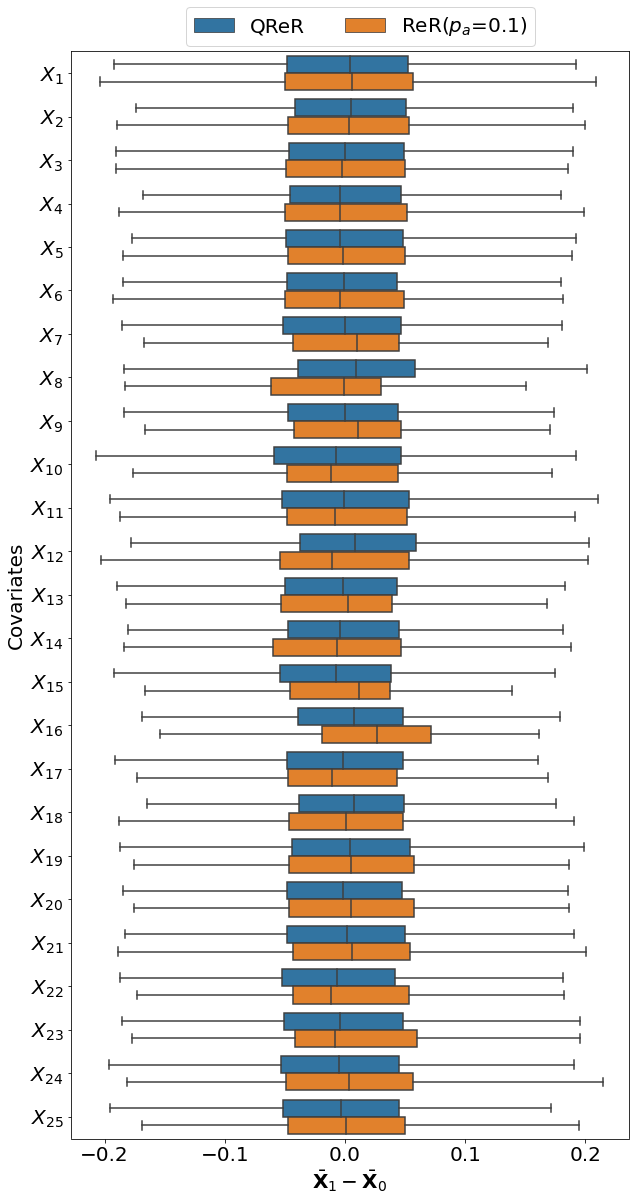

Skip! The model has been trained.
Initialize the network via pretraining.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 50.32it/s]

Pretraining complete!


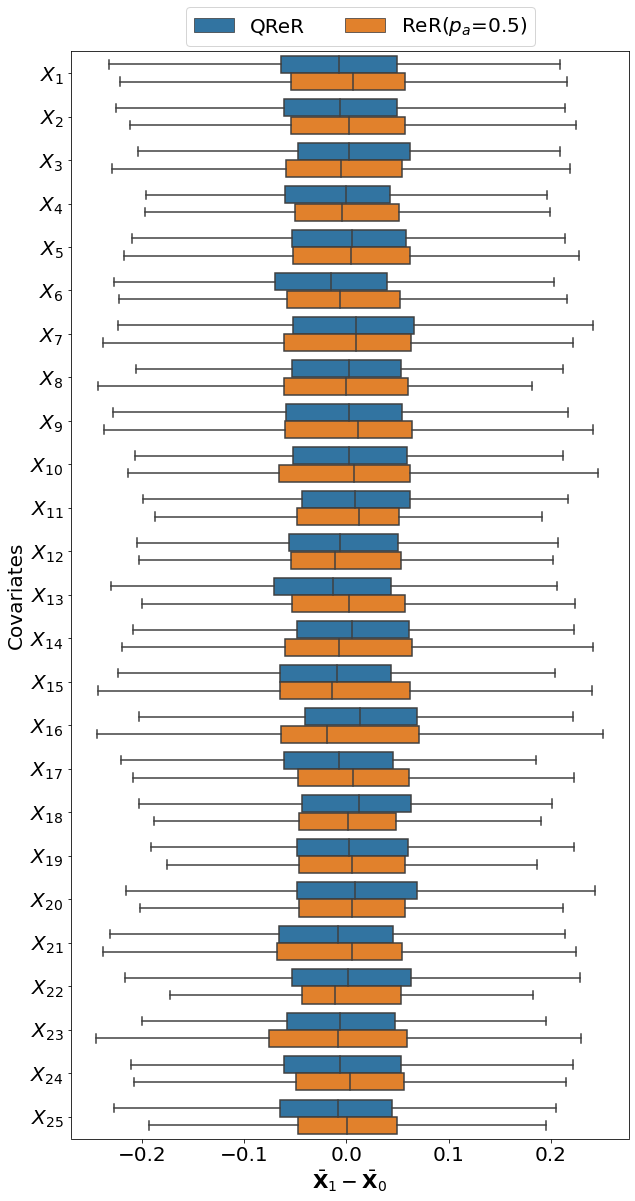

Skip! The model has been trained.
Initialize the network via pretraining.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 76.68it/s]

Pretraining complete!


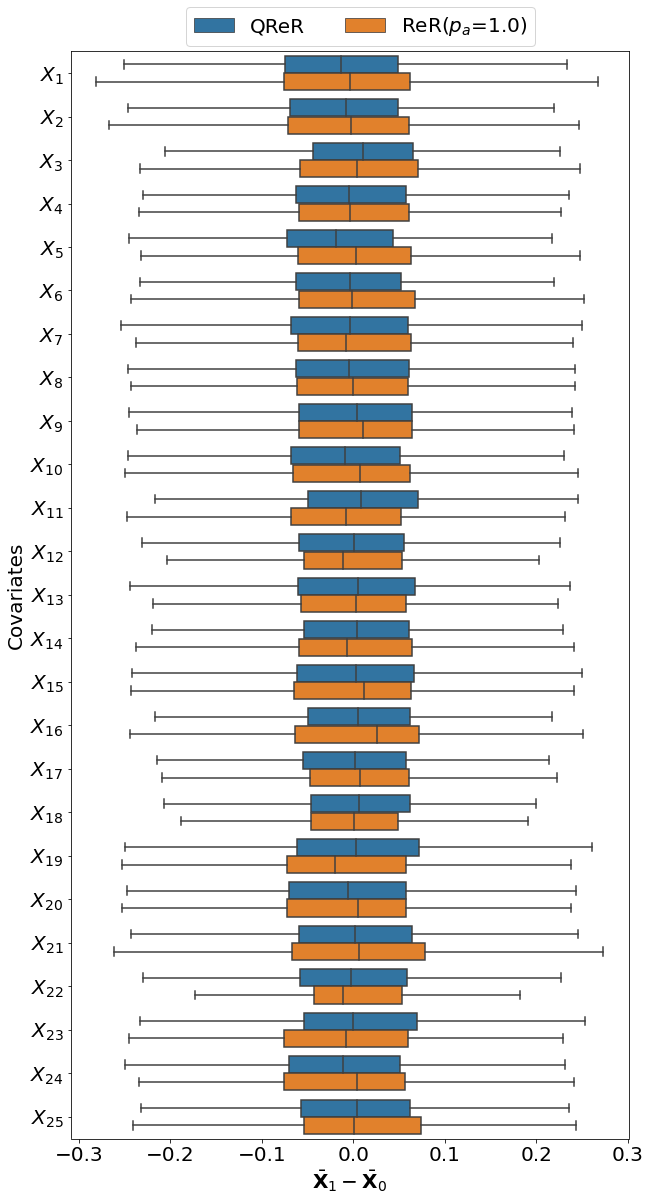

In [16]:
qrer_df_list = []

for pa in [0.1,0.5,1]:
    batch_size = 512
    lr = 1e-3
    val_metric = 'KS'
    x_lambda = 1
    wt_lambda = 1
    num_nodes = 512
    num_iters = 5000
    num_noval_iters = 0
    num_init_iters = 500
    patience = 15
    save_folder = './save/'
    random_state = 0
    kernel_params = {'kernel':'rbf',
                     'gamma':10, 
                     'degree':2,
                     'c':1}

    save_folder_qrer = save_folder_root + 'qrer/pa='+str(pa)+'/'
    if not os.path.exists(save_folder_qrer):
        print('Creat the folder for QReR.')
        os.makedirs(save_folder_qrer)

    if not os.path.exists(save_folder_qrer +'final_checkpoint.pt'):
        print('Train the model from scratch.')
        torch.manual_seed(seed)
        estimator = QReR(lr=lr,
                         batch_size=batch_size,
                         patience=patience,
                         num_iters=num_iters,
                         num_init_iters=num_init_iters,
                         num_noval_iters=num_noval_iters,
                         pa=pa,
                         x_lambda=x_lambda,
                         wt_lambda=wt_lambda,
                         num_nodes=num_nodes,
                         save_folder=save_folder_qrer,
                         val_metric=val_metric,
                         verbose=False,
                         kernel_params=kernel_params,
                         random_state=random_state)
    
        estimator.fit(x,z)
    else:
        print('Skip! The model has been trained.')
        torch.manual_seed(seed)
        estimator = QReR(lr=lr,
                          batch_size=batch_size,
                          patience=patience,
                          num_iters=num_iters,
                          num_init_iters=1,
                          pa=pa,
                          x_lambda=x_lambda,
                          wt_lambda=wt_lambda,
                          num_nodes=num_nodes,
                          val_metric=val_metric,
                          save_folder=save_folder_qrer,
                          kernel_params=kernel_params,
                          verbose=False,
                          random_state=random_state)
        estimator.w = z
        estimator.nwts = int(estimator.w.shape[0])
        estimator.nt = int(z.sum())
        estimator.nc = int((1-z).sum())
        estimator._init_network()
        estimator.netG.load_state_dict(torch.load(save_folder_qrer+'final_checkpoint.pt'))
        
    # inference
    np.random.seed(seed)
    torch.manual_seed(seed)
        
    z_mat_rer = np.load(save_folder_rer+'zmat_pa'+str(pa*10)+'.npy')
    wts_mat_net = estimator.predict(1000).numpy()
    
    from scipy.stats import ks_2samp
    mdiff_mat_net = np.array([cov_mdiff(x,z,wts_mat_net[i]) for i in range(wts_mat_net.shape[0])])
    mdiff_mat_rer = np.array([cov_mdiff(x,z_mat_rer[i]) for i in range(z_mat_rer.shape[0])])

    df_mdiff_net = pd.DataFrame(mdiff_mat_net,columns=['$X_{'+str(i+1)+'}$' for i in range(mdiff_mat_net.shape[1])])
    df_mdiff_net['Method'] = 'QReR'
    df_mdiff_rer = pd.DataFrame(mdiff_mat_rer,columns=['$X_{'+str(i+1)+'}$' for i in range(mdiff_mat_rer.shape[1])])
    df_mdiff_rer['Method'] = 'ReR($p_a$=%.1f)'%(pa)

    df_mdiff = pd.concat([df_mdiff_net,df_mdiff_rer],axis=0)
    df_mdiff = pd.melt(df_mdiff,id_vars=['Method'],var_name=['Variable'],value_name='Value')
    
    plt.figure(figsize=(10,20))
    sb.boxplot(x='Value',
               y='Variable',
               orient='h',
               hue="Method",data=df_mdiff,showfliers = False)
    plt.ylabel('Covariates',fontsize=20)
    plt.xlabel('$\\bar{\mathbf{X}}_1-\\bar{\mathbf{X}}_0$',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(bbox_to_anchor=(0.85, 1.05),ncol=2,fontsize=20)
    plt.savefig(save_folder_root+'/ihdp_mdiff_pa'+str(int(pa*10))+'.pdf')
    plt.show()

### Inference

In [17]:
qrer_df_list = []

for pa in [0.1,0.5,1]:
    batch_size = 512
    lr = 1e-3
    val_metric = 'KS'
    x_lambda = 1
    wt_lambda = 1
    num_nodes = 512
    num_iters = 5000
    num_noval_iters = 0
    num_init_iters = 500
    patience = 15
    save_folder = './save/'
    random_state = 0
    kernel_params = {'kernel':'rbf',
                     'gamma':10, 
                     'degree':2,
                     'c':1}
    
    x = df_list[0][['x'+str(i+1) for i in range(25)]].values
    sc = StandardScaler()
    x = sc.fit_transform(x)
    z = df_list[0]['t'].values

    save_folder_qrer = save_folder_root + 'qrer/pa='+str(pa)+'/'
    if not os.path.exists(save_folder_qrer):
        print('Creat the folder for QReR.')
        os.makedirs(save_folder_qrer)

    if not os.path.exists(save_folder_qrer +'final_checkpoint.pt'):
        print('Train the model from scratch.')

        estimator = QReR(lr=lr,
                         batch_size=batch_size,
                         patience=patience,
                         num_iters=num_iters,
                         num_init_iters=num_init_iters,
                         num_noval_iters=num_noval_iters,
                         pa=pa,
                         x_lambda=x_lambda,
                         wt_lambda=wt_lambda,
                         num_nodes=num_nodes,
                         save_folder=save_folder_qrer,
                         val_metric=val_metric,
                         verbose=False,
                         kernel_params=kernel_params,
                         random_state=random_state)
    
        estimator.fit(x,z)
    else:
        print('Skip! The model has been trained.')
        estimator = QReR(lr=lr,
                          batch_size=batch_size,
                          patience=patience,
                          num_iters=num_iters,
                          num_init_iters=1,
                          pa=pa,
                         x_lambda=x_lambda,
                         wt_lambda=wt_lambda,
                          num_nodes=num_nodes,
                          val_metric=val_metric,
                          save_folder=save_folder_qrer,
                          kernel_params=kernel_params,
                          verbose=False,
                          random_state=random_state)
        estimator.w = z
        estimator.nwts = int(estimator.w.shape[0])
        estimator.nt = int(z.sum())
        estimator.nc = int((1-z).sum())
        estimator._init_network()
        estimator.netG.load_state_dict(torch.load(save_folder_qrer+'final_checkpoint.pt'))
        
    # inference
    np.random.seed(seed)
    torch.manual_seed(seed)

    wts_mat_net = estimator.predict(1000).numpy()
    wts = wts_mat_net[1]
    avg_wts = wts_mat_net.mean(axis=0)
    
    if not os.path.exists(save_folder_qrer+'sate'+str(pa*10)+'.npz'):
        
        np.random.seed(seed)
        torch.manual_seed(seed)
        
        sate_qrer_s_array = []
        sate_qrer_m_array = []

        for i in tqdm(range(100)):

            yf = df_list[i]['yf'].values
            ycf = df_list[i]['ycf'].values
            y1 = yf*z + ycf*(1-z)
            y0 = yf*(1-z) + ycf*(z)

            sate_qrer_s = tau_diff(yf,z,wts)
            sate_qrer_s_array.append(sate_qrer_s)

            sate_qrer_m = tau_diff(yf,z,avg_wts)
            sate_qrer_m_array.append(sate_qrer_m)

        sate_qrer_s_array = np.array(sate_qrer_s_array)
        sate_qrer_m_array = np.array(sate_qrer_m_array)
        
        np.savez(save_folder_qrer+'sate'+str(pa*10)+'.npz',
                 point1=sate_qrer_s_array,
                 point2=sate_qrer_m_array)
        
    else:
        qrer_arrays = np.load(save_folder_qrer+'sate'+str(pa*10)+'.npz')
        sate_qrer_s_array = qrer_arrays['point1']
        sate_qrer_m_array = qrer_arrays['point2']
    
    # QReR_S
    bias_qrer_s = np.mean(sate_qrer_s_array-sate_all)
    rmse_qrer_s = np.sqrt(np.mean((sate_qrer_s_array-sate_all)**2))
    
    bias_qrer_s_mcse, rmse_qrer_s_mcse = mcse_cal_fun(sate_qrer_s_array-sate_all,tau=0)
    
    # QReR_M
    bias_qrer_m = np.mean(sate_qrer_m_array-sate_all)
    rmse_qrer_m = np.sqrt(np.mean((sate_qrer_m_array-sate_all)**2))
    
    bias_qrer_m_mcse, rmse_qrer_m_mcse = mcse_cal_fun(sate_qrer_m_array-sate_all,tau=0)
    
    qrer_df = pd.DataFrame({'method':['QReR-S','QReR-M'],
                           'pa':[pa,pa],
                           'bias':[bias_qrer_s,bias_qrer_m],
                           'bias_mcse':[bias_qrer_s_mcse,bias_qrer_m_mcse],
                           'rmse':[rmse_qrer_s,rmse_qrer_m],
                           'rmse_mcse':[rmse_qrer_s_mcse,rmse_qrer_m_mcse]})
    qrer_df_list.append(qrer_df)

Skip! The model has been trained.
Initialize the network via pretraining.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 76.69it/s]

Pretraining complete!


Skip! The model has been trained.
Initialize the network via pretraining.


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 110.92it/s]

Pretraining complete!
Skip! The model has been trained.


Initialize the network via pretraining.


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 112.78it/s]

Pretraining complete!


In [18]:
qrer_df_all = pd.concat(qrer_df_list)
sate_df = pd.concat([rer_df_all,qrer_df_all])
sate_df = sate_df.sort_values(by=['pa','method'])
sate_df

,method,pa,bias,bias_mcse,rmse,rmse_mcse
1,QReR-M,0.1,-0.016025,0.018873,0.185235,0.018650
0,QReR-S,0.1,0.068396,0.028852,0.293546,0.083670
0,ReR,0.1,-0.008252,0.020496,0.208352,0.038610
1,QReR-M,0.5,-0.034861,0.019406,0.193388,0.024342
0,QReR-S,0.5,0.018639,0.033855,0.344992,0.039203
0,ReR,0.5,0.016948,0.017892,0.179903,0.025804
1,QReR-M,1.0,-0.031349,0.017773,0.175950,0.016233
0,QReR-S,1.0,-0.104208,0.033076,0.340071,0.060732
0,ReR,1.0,-0.021924,0.024804,0.246498,0.046070


In [19]:
sate_df.to_csv(save_folder_root+'sate.csv')

## Other Methods

In [20]:
wrappers_list = [ipw_wrapper,match_wrapper,matchit_wrapper,
                 ebal_wrapper,optweight_wrapper,ate_wrapper]
name_list = ['IPW','PSM','FM','EBAL','SBW','EBCW']
pate_benchmarks_lists = [[] for i in range(len(name_list))]

In [21]:
save_folder_pate = save_folder_root + 'pate/'

In [22]:
if not os.path.exists(save_folder_pate):
    os.makedirs(save_folder_pate)

if not os.path.exists(save_folder_pate+'benchmarks.npy'):
    
    for i in tqdm(range(100)):
    
        x = df_list[0][['x'+str(i+1) for i in range(25)]].values
        sc = StandardScaler()
        x = sc.fit_transform(x)
        z = df_list[0]['t'].values
        y = df_list[i]['yf'].values

        for j,wrapper in enumerate(wrappers_list):
            try:
                rlts = wrapper(y,z,x)
                est = rlts
            except:
                est = np.nan
            pate_benchmarks_lists[j].append([est])

    pate_benchmarks_lists = np.array(pate_benchmarks_lists)
    pate_benchmarks_lists = pate_benchmarks_lists.reshape(-1,100)
    np.save(save_folder_pate+'benchmarks.npy',pate_benchmarks_lists)

else:
    pate_benchmarks_lists = np.load(save_folder_pate+'benchmarks.npy')

In [23]:
pate_benchmarks_bias = np.mean(pate_benchmarks_lists - pate_all.reshape(-1,100),axis=1)
pate_benchmarks_bias

array([-0.85339327,  0.06450624, -0.10118671, -0.0282019 , -0.03012232,
       -0.02816495])

In [24]:
pate_benchmarks_rmse = np.sqrt(np.mean((pate_benchmarks_lists - pate_all.reshape(-1,100))**2,axis=1))
pate_benchmarks_rmse

array([1.14324024, 0.23069285, 0.29541227, 0.18407935, 0.18044308,
       0.18386888])

In [25]:
pate_benchmarks_mcse = np.apply_along_axis(func1d=mcse_cal_fun,
                        arr=pate_benchmarks_lists - pate_all.reshape(-1,100),
                        axis=1,tau=0)
pate_benchmarks_bias_mcse = pate_benchmarks_mcse[:,0]
pate_benchmarks_rmse_mcse = pate_benchmarks_mcse[:,1]

In [26]:
pate_benchmarks_df = pd.DataFrame({
    'method':name_list,
    'bias':pate_benchmarks_bias,
    'bias_mcse':pate_benchmarks_bias_mcse,
    'rmse':pate_benchmarks_rmse,
    'rmse_mcse':pate_benchmarks_rmse_mcse,
})
pate_benchmarks_df

,method,bias,bias_mcse,rmse,rmse_mcse
0,IPW,-0.853393,0.073503,1.143240,0.116991
1,PSM,0.064506,0.022127,0.230693,0.037973
2,FM,-0.101187,0.027636,0.295412,0.056702
3,EBAL,-0.028202,0.018536,0.184079,0.017848
4,SBW,-0.030122,0.018150,0.180443,0.018125
5,EBCW,-0.028165,0.018513,0.183869,0.017713


In [27]:
for pa in [0.1]:
    batch_size = 512
    lr = 1e-3
    val_metric = 'KS'
    x_lambda = 1
    wt_lambda = 1
    num_nodes = 512
    num_iters = 5000
    num_noval_iters = 0
    num_init_iters = 500
    patience = 15
    save_folder = './save/'
    random_state = 0
    kernel_params = {'kernel':'rbf',
                     'gamma':10, 
                     'degree':2,
                     'c':1}
    
    x = df_list[0][['x'+str(i+1) for i in range(25)]].values
    sc = StandardScaler()
    x = sc.fit_transform(x)
    z = df_list[0]['t'].values

    save_folder_qrer = save_folder_root + 'qrer/pa='+str(pa)+'/'
    if not os.path.exists(save_folder_qrer):
        print('Creat the folder for QReR.')
        os.makedirs(save_folder_qrer)

    if not os.path.exists(save_folder_qrer +'final_checkpoint.pt'):
        print('Train the model from scratch.')
        estimator = QReR(lr=lr,
                         batch_size=batch_size,
                         patience=patience,
                         num_iters=num_iters,
                         num_init_iters=num_init_iters,
                         num_noval_iters=num_noval_iters,
                         pa=pa,
                         x_lambda=x_lambda,
                         wt_lambda=wt_lambda,
                         num_nodes=num_nodes,
                         save_folder=save_folder_qrer,
                         val_metric=val_metric,
                         verbose=True,
                         kernel_params=kernel_params,
                         random_state=random_state)
    
        estimator.fit(x,z)
    else:
        print('Skip! The model has been trained.')
        estimator = QReR(lr=lr,
                          batch_size=batch_size,
                          patience=patience,
                          num_iters=num_iters,
                          num_init_iters=1,
                          pa=pa,
                          x_lambda=x_lambda,
                          wt_lambda=wt_lambda,
                          num_nodes=num_nodes,
                          val_metric=val_metric,
                          save_folder=save_folder_qrer,
                          kernel_params=kernel_params,
                          verbose=False,
                          random_state=random_state)
        estimator.w = z
        estimator.nwts = int(estimator.w.shape[0])
        estimator.nt = int(z.sum())
        estimator.nc = int((1-z).sum())
        estimator._init_network()
        estimator.netG.load_state_dict(torch.load(save_folder_qrer+'final_checkpoint.pt'))
        
    # inference
    np.random.seed(seed)
    torch.manual_seed(seed)

    wts_mat_net = estimator.predict(1000).numpy()
    avg_wts = wts_mat_net.mean(axis=0)
    pate_qrer_m_array = []

    for i in tqdm(range(100)):

        yf = df_list[i]['yf'].values
        
        pate_qrer_m = tau_diff(yf,z,avg_wts)
        pate_qrer_m_array.append(pate_qrer_m)

    pate_qrer_m_array = np.array(pate_qrer_m_array)

    pate_qrer_bias = np.mean(pate_qrer_m_array-pate_all)
    pate_qrer_rmse = np.sqrt(np.mean((pate_qrer_m_array-pate_all)**2))
    
    pate_qrer_bias_mcse, pate_qrer_rmse_mcse = mcse_cal_fun(pate_qrer_m_array-pate_all,tau=0)

Skip! The model has been trained.
Initialize the network via pretraining.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 76.95it/s]


Pretraining complete!


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 21399.51it/s]


In [30]:
pate_qrer_df = pd.DataFrame({'method':['QReR-M'],
                   'bias':[pate_qrer_bias],
                   'bias_mcse':[pate_qrer_bias_mcse],
                   'rmse':[pate_qrer_rmse],
                   'rmse_mcse':[pate_qrer_rmse_mcse]})
pate_qrer_df

,method,bias,bias_mcse,rmse,rmse_mcse
0,QReR-M,-0.020921,0.019395,0.191199,0.017373


In [31]:
pate_df = pd.concat([pate_benchmarks_df,pate_qrer_df])
pate_df.to_csv(save_folder_root+'pate.csv')
pate_df

,method,bias,bias_mcse,rmse,rmse_mcse
0,IPW,-0.853393,0.073503,1.143240,0.116991
1,PSM,0.064506,0.022127,0.230693,0.037973
2,FM,-0.101187,0.027636,0.295412,0.056702
3,EBAL,-0.028202,0.018536,0.184079,0.017848
4,SBW,-0.030122,0.018150,0.180443,0.018125
5,EBCW,-0.028165,0.018513,0.183869,0.017713
0,QReR-M,-0.020921,0.019395,0.191199,0.017373
